In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [3]:
df = pd.read_csv('Sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Exploratory Data Analysis

In [6]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


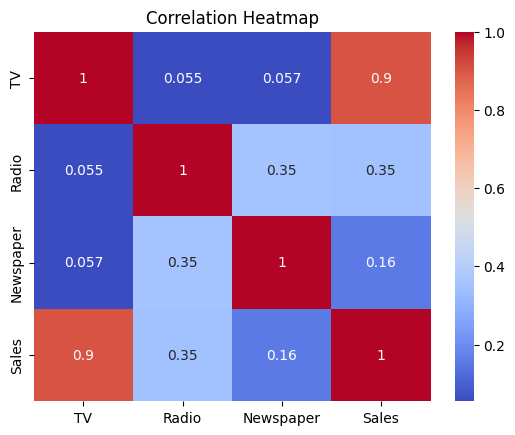

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation matrix showing that tv is highly correlate with sales which means, TV columns is playing more role/importance in the sales.

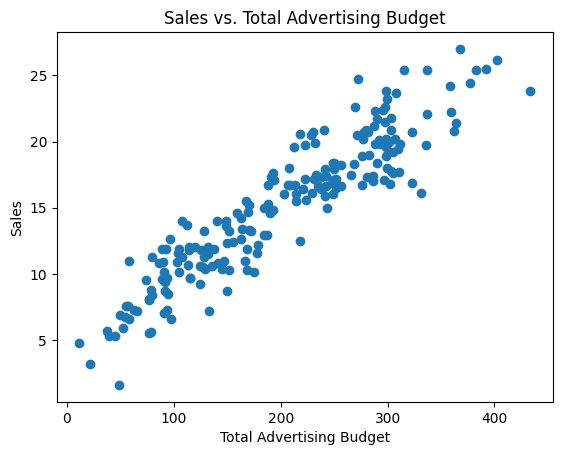

In [13]:
import matplotlib.pyplot as plt
total_budget = df['TV'] + df['Radio'] + df['Newspaper']
plt.scatter(total_budget, df['Sales'])
plt.xlabel('Total Advertising Budget')
plt.ylabel('Sales')
plt.title('Sales vs. Total Advertising Budget')
plt.show()

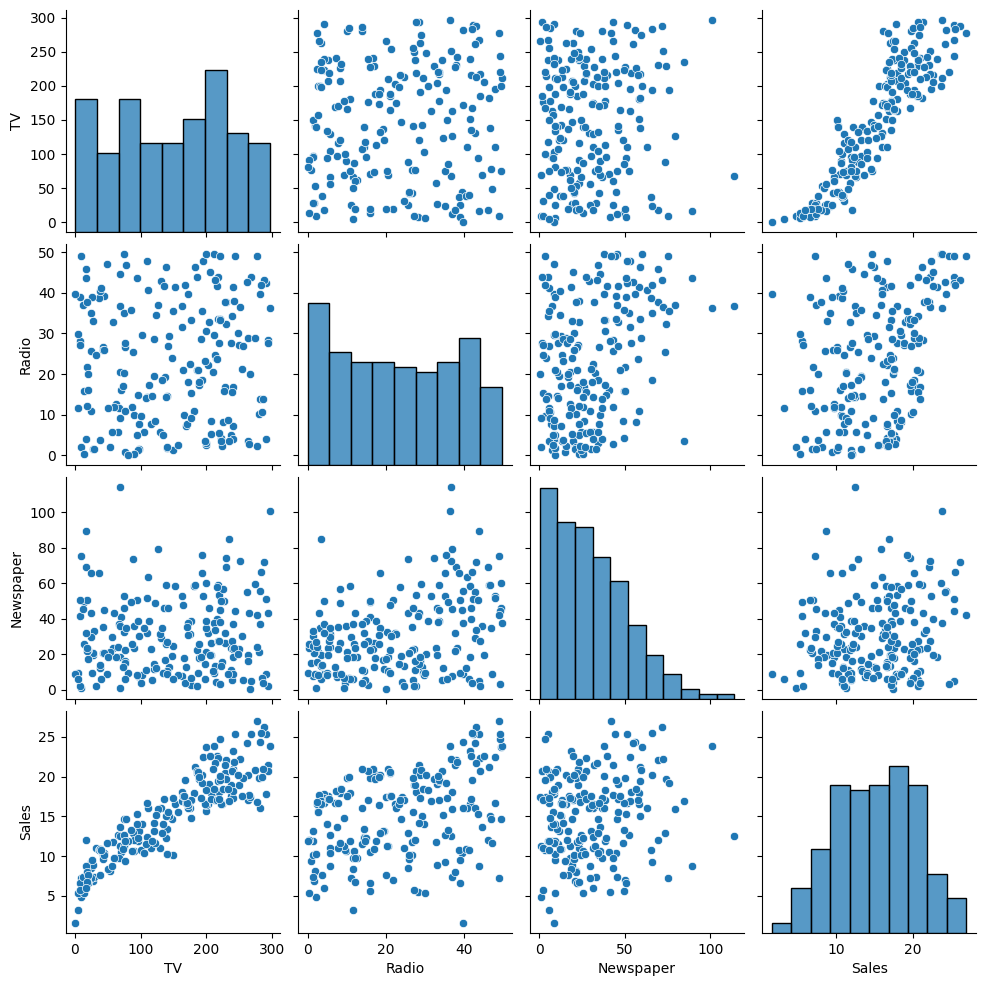

In [14]:
sns.pairplot(df, vars=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.show()

In [ ]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

In [ ]:
report = ProfileReport(df)

In [ ]:
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape

(160, 3)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

# XGBoost
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
# Step 4: Make Predictions and Evaluate Models
models = [random_forest_model, dt_reg, knn_model,gradient_boosting_model,xgb_reg]

for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("="*50)


Model: RandomForestRegressor
Mean Squared Error: 1.4688953750000044
R-squared: 0.9524646250457102
Model: DecisionTreeRegressor
Mean Squared Error: 3.4019999999999997
R-squared: 0.8899068317956319
Model: KNeighborsRegressor
Mean Squared Error: 3.115529999999999
R-squared: 0.8991773755626823
Model: GradientBoostingRegressor
Mean Squared Error: 1.2213281023628968
R-squared: 0.9604762256889594
Model: XGBRegressor
Mean Squared Error: 1.4514290545159532
R-squared: 0.953029858014247



After looking at all the different models performance, I found that Gradient Boosting worked the best. It gave more accurate predictions than Decision Trees, Random Forests, k-Nearest Neighbors, and Extreme Gradient Boosting. So, we'll use Gradient Boosting because it's reliable and works well in real-world situations.

In [31]:
from sklearn.model_selection import cross_val_score, KFold

In [32]:
# Random Forest
random_forest_model = RandomForestRegressor()

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()

# Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor()

# XGBoost
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [36]:
# Step 4: Make Predictions and Evaluate Models
models = [random_forest_model, dt_reg, knn_model,gradient_boosting_model,xgb_reg]

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"Model: {model.__class__.__name__}")
    print("Cross-Validation Scores:", scores)
    print("Mean R-squared:", scores.mean())
    print("="*50)


Model: RandomForestRegressor
Cross-Validation Scores: [0.93273103 0.9726531  0.94417525 0.90546834 0.94408974]
Mean R-squared: 0.9398234932674173
Model: DecisionTreeRegressor
Cross-Validation Scores: [0.87048586 0.92568569 0.92218474 0.91171979 0.89868736]
Mean R-squared: 0.905752686982869
Model: KNeighborsRegressor
Cross-Validation Scores: [0.89698398 0.92257948 0.9129207  0.87021565 0.88863247]
Mean R-squared: 0.8982664580767274
Model: GradientBoostingRegressor
Cross-Validation Scores: [0.93329405 0.96579964 0.94670797 0.92515416 0.92232151]
Mean R-squared: 0.9386554672418821
Model: XGBRegressor
Cross-Validation Scores: [0.92390512 0.95904531 0.95107616 0.89922239 0.9453474 ]
Mean R-squared: 0.935719274801215


Initially, I believed Gradient Boosting (GB) to be the best model. However, after applying cross-validation (CV) with 5 folds, Random Forest (RF) showed better performance. Interestingly, when I increased the number of folds to 7 or 10, Gradient Boosting started performing better, indicating the competitiveness between Random Forest and Gradient Boosting.